Copyright 2020 Andrew M. Olney and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.


# Naive Bayes: Problem solving

In this session, we will use the `mushroom` dataset.
This dataset describes mushrooms along various nominal variables and labels them as poisonous or edible.
Because the original dataset is a fair bit larger, we've randomly sampled 2000 rows.

The goal is to predict `class`: whether the mushroom is poisonous or not.

| Variable                 | Type    | Description                                                                                         |
|:--------------------------|:---------|:-----------------------------------------------------------------------------------------------------|
| cap-shape                | Nominal | bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s                                                |
| cap-surface              | Nominal | fibrous=f,grooves=g,scaly=y,smooth=s                                                                |
| cap-color                | Nominal | brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y                    |
| bruises?                 | Nominal | bruises=t,no=f                                                                                      |
| odor                     | Nominal | almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s                        |
| gill-attachment          | Nominal | attached=a,descending=d,free=f,notched=n                                                            |
| gill-spacing             | Nominal | close=c,crowded=w,distant=d                                                                         |
| gill-size                | Nominal | broad=b,narrow=n                                                                                    |
| gill-color               | Nominal | black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y |
| stalk-shape              | Nominal | enlarging=e,tapering=t                                                                              |
| stalk-surface-above-ring | Nominal | fibrous=f,scaly=y,silky=k,smooth=s                                                                  |
| stalk-surface-below-ring | Nominal | fibrous=f,scaly=y,silky=k,smooth=s                                                                  |
| stalk-color-above-ring   | Nominal | brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y                            |
| stalk-color-below-ring   | Nominal | brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y                            |
| veil-type                | Nominal | partial=p,universal=u                                                                               |
| veil-color               | Nominal | brown=n,orange=o,white=w,yellow=y                                                                   |
| ring-number              | Nominal | none=n,one=o,two=t                                                                                  |
| ring-type                | Nominal | cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z                      |
| spore-print-color        | Nominal | black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y                      |
| population               | Nominal | abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y                                 |
| habitat                  | Nominal | grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d                                       |
| class                    | Nominal | edible or poisonous                                                                                 |

<div style="text-align:center;font-size: smaller">
 <b>Source:</b> This dataset was taken from the <a href="https://archive.ics.uci.edu/ml/datasets/Mushroom">UCI Machine Learning Repository library
    </a></div>
<br>

## Load data

Import `pandas` so we can load a dataframe.

In [1]:
import pandas as pd

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="A]5Vf/x,=8dk=KKk3OrJ">pd</variable></variables><block type="importAs" id="G*NhDz5Jo?CcaJf3rUv}" x="150" y="308"><field name="libraryName">pandas</field><field name="VAR" id="A]5Vf/x,=8dk=KKk3OrJ">pd</field></block></xml>

Load the dataframe with `datasets/mushroom.csv`.

In [10]:
dataframe = pd.read_csv('datasets/mushroom.csv')

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable><variable id="A]5Vf/x,=8dk=KKk3OrJ">pd</variable></variables><block type="variables_set" id="FJGldw(qFp?V=E]uaN)4" x="89" y="112"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><value name="VALUE"><block type="varDoMethod" id="4s18v%0iqE%_l@{fLYCo"><mutation items="1"></mutation><field name="VAR" id="A]5Vf/x,=8dk=KKk3OrJ">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="ADD0"><block type="text" id="eWD~~e0+@%p*M)eEoc3e"><field name="TEXT">datasets/mushroom.csv</field></block></value></block></value></block><block type="variables_get" id="LU;SsSyQIG~vP4LKy,x$" x="88" y="202"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field></block></xml>

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           y         y       f    f               f   
1        p         f           y         n       f    f               f   
2        e         x           y         n       t    a               f   
3        e         f           y         u       f    n               f   
4        e         b           y         y       t    l               f   
...    ...       ...         ...       ...     ...  ...             ...   
1995     p         x           f         y       f    f               f   
1996     e         f           f         n       t    n               f   
1997     e         f           f         w       f    n               f   
1998     e         x           y         n       t    n               f   
1999     p         x           s         e       f    s               f   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0               c         b          g  ...                        k   
1               c         n          b  ...                        s   
2               c         b          n  ...                        y   
3               c         n          u  ...                        f   
4               c         b          k  ...                        s   
...           ...       ...        ...  ...                      ...   
1995            c         b          p  ...                        k   
1996            c         b          u  ...                        s   
1997            w         b          n  ...                        s   
1998            c         b          p  ...                        s   
1999            c         n          b  ...                        s   

     stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                         b                      b         p          w   
1                         w                      p         p          w   
2                         w                      w         p          w   
3                         w                      w         p          w   
4                         w                      w         p          w   
...                     ...                    ...       ...        ...   
1995                      n                      b         p          w   
1996                      g                      w         p          w   
1997                      w                      w         p          w   
1998                      p                      w         p          w   
1999                      w                      p         p          w   

     ring-number ring-type spore-print-color population habitat  
0              o         l                 h          v       g  
1              o         e                 w          v       p  
2              o         p                 n          s       g  
3              o         f                 h          v       d  
4              o         p                 k          s       g  
...          ...       ...               ...        ...     ...  
1995           o         l                 h          y       g  
1996           o         p                 n          v       d  
1997           o         e                 k          a       g  
1998           o         p                 k          y       d  
1999           o         e                 w          v       d  

[2000 rows x 22 columns]

## Explore data

Check the data makes sense with the five figure summary.

In [12]:
dataframe.describe()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable></variables><block type="varDoMethod" id="-[lX-}4sT`|#7E(Sti)^" x="78" y="266"><mutation items="1"></mutation><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><field name="MEMBER">describe</field><data>dataframe:describe</data></block></xml>

class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   2000      2000        2000      2000    2000  2000            2000   
unique     2         5           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    1059       911         803       608    1178   904            1943   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          2000      2000       2000  ...                     2000   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           1673      1379        427  ...                     1215   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    2000                   2000      2000       2000   
unique                      9                      9         1          4   
top                         w                      w         p          w   
freq                     1067                   1087      2000       1942   

       ring-number ring-type spore-print-color population habitat  
count         2000      2000              2000       2000    2000  
unique           3         5                 9          6       7  
top              o         p                 w          v       d  
freq          1838       971               600       1013     793  

[4 rows x 22 columns]

------------------
**QUESTION:**

Did any variables have NaN? How do you know?

**ANSWER: (click here to edit)**

*All have a count of 2000, which is our # of rows, so no NaN.*

-------------------

**QUESTION:**

Looking at `freq` for each variable, how do you think the levels of these variables are distributed?

**ANSWER: (click here to edit)**

*Guessing unevenly. Plotting would reveal.*

-------------------

Plot each variable separately.

First import `plotly.express`.

In [15]:
import plotly.express as px

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable></variables><block type="importAs" id="JKd}DIrGfV*IelKZ!4ls" x="129" y="219"><field name="libraryName">plotly.express</field><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field></block></xml>

Create an empty histogram figure.

In [25]:
fig = px.histogram(dataframe)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="AriMCkUM!81vTeAcb+6,">fig</variable><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable></variables><block type="variables_set" id="Ud?VzKCO`DdWL1!WV3u0" x="72" y="201"><field name="VAR" id="AriMCkUM!81vTeAcb+6,">fig</field><value name="VALUE"><block type="varDoMethod" id="}D2RF2=Z|$`_ypJyLDYt"><mutation items="1"></mutation><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field><field name="MEMBER">histogram</field><data>px:histogram</data><value name="ADD0"><block type="variables_get" id="sjIOH36;c%QSq3_6qrP9"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field></block></value></block></value></block></xml>

Plot histograms of all the variables in a loop.

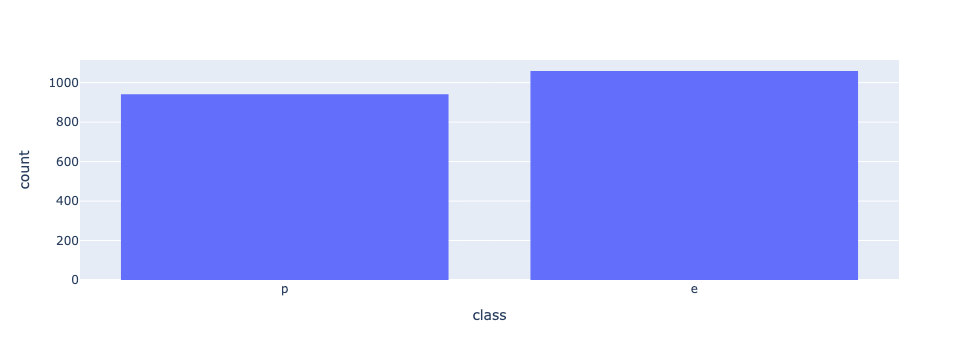

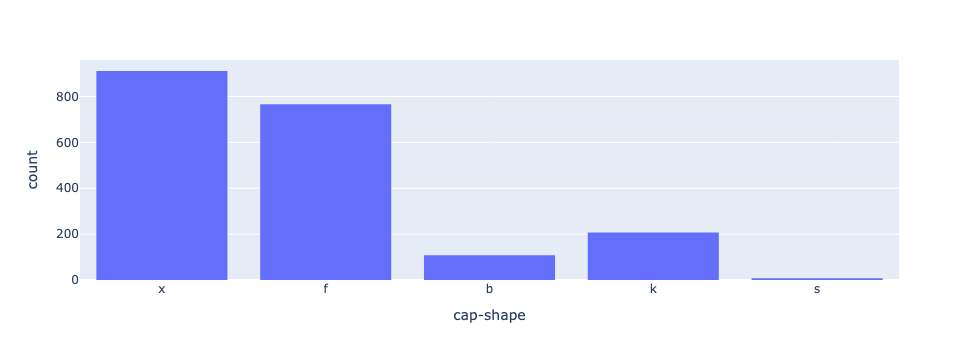

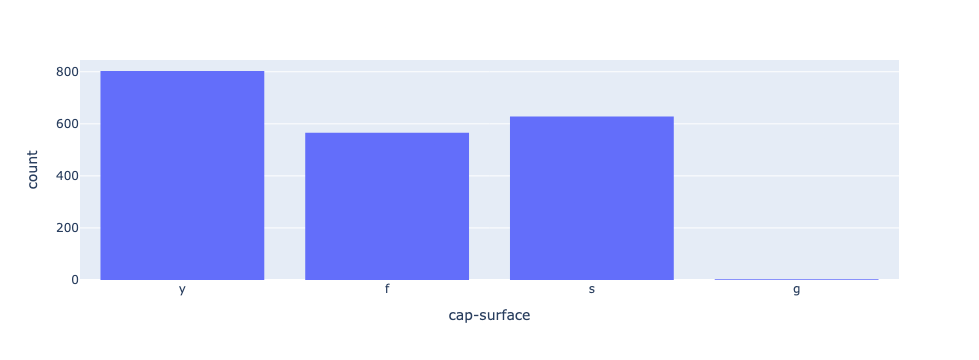

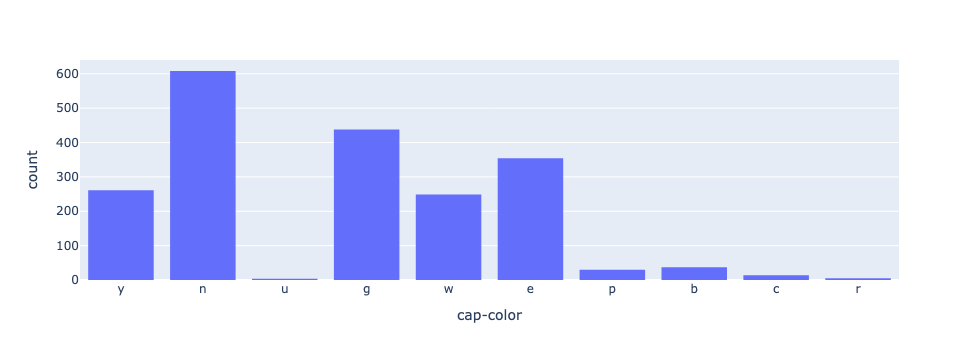

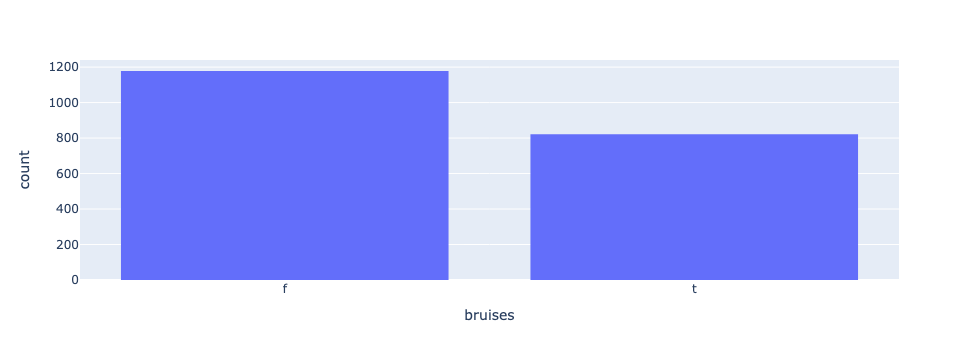

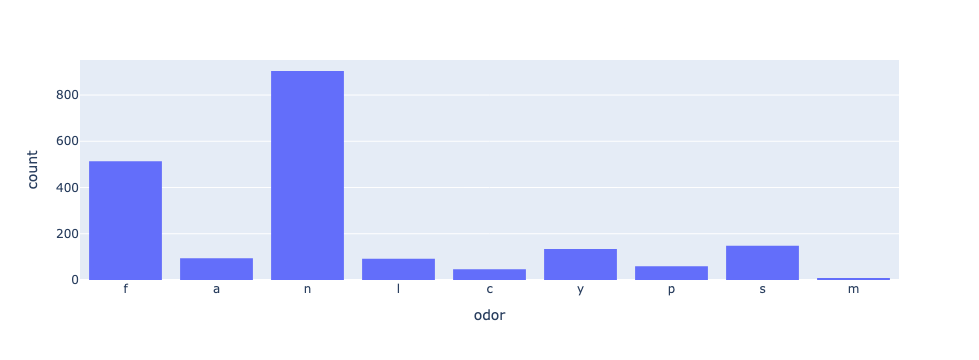

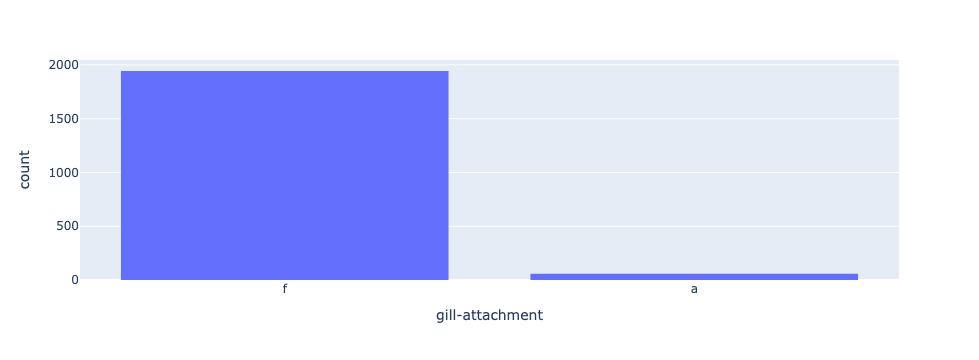

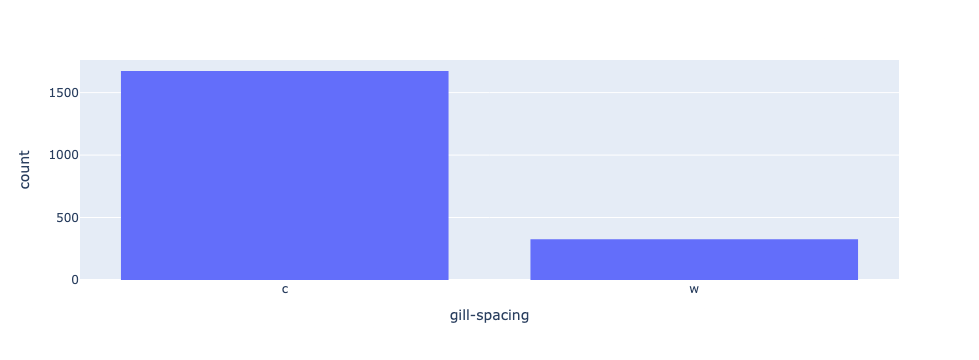

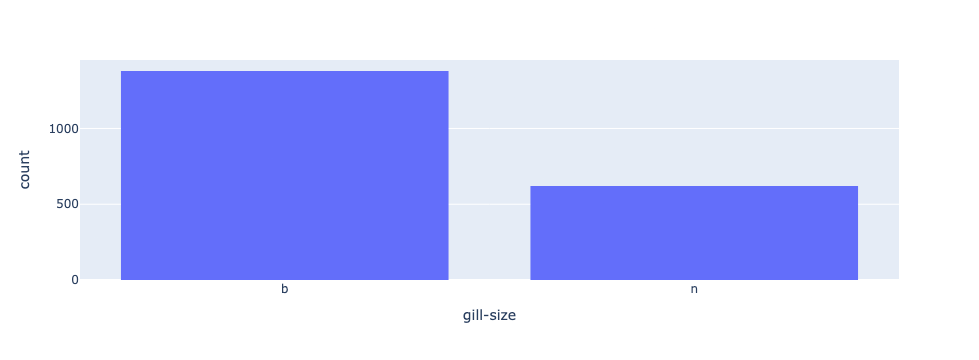

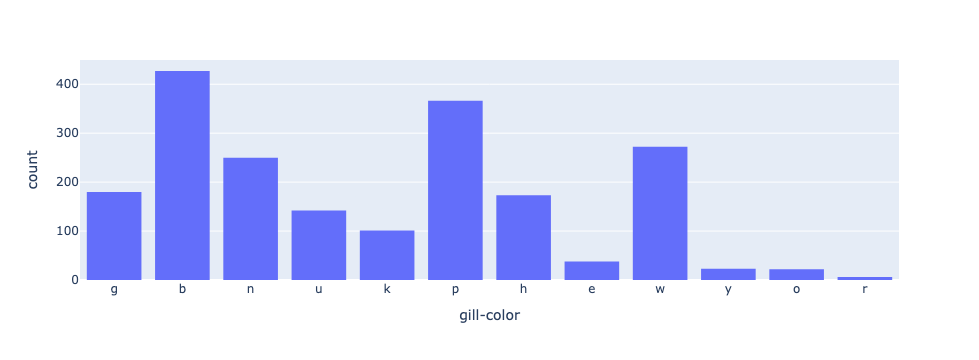

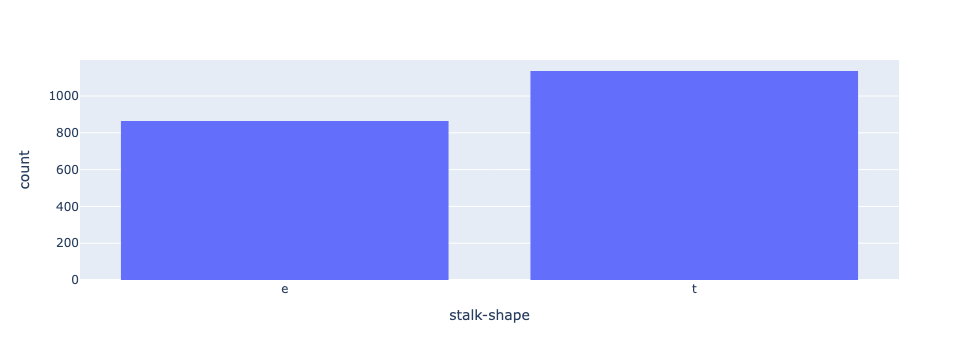

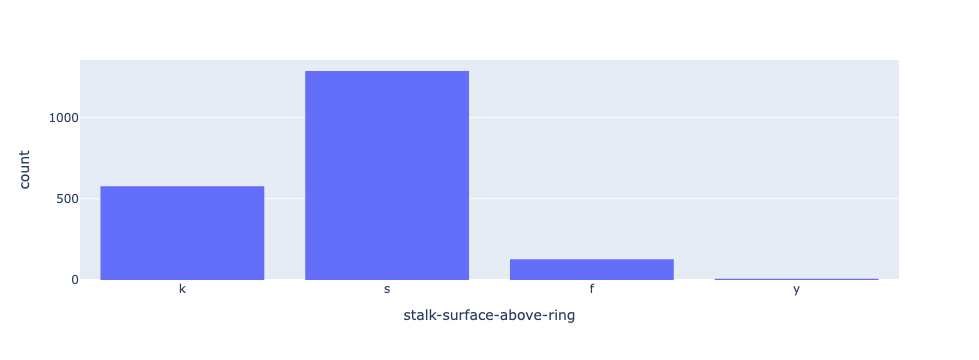

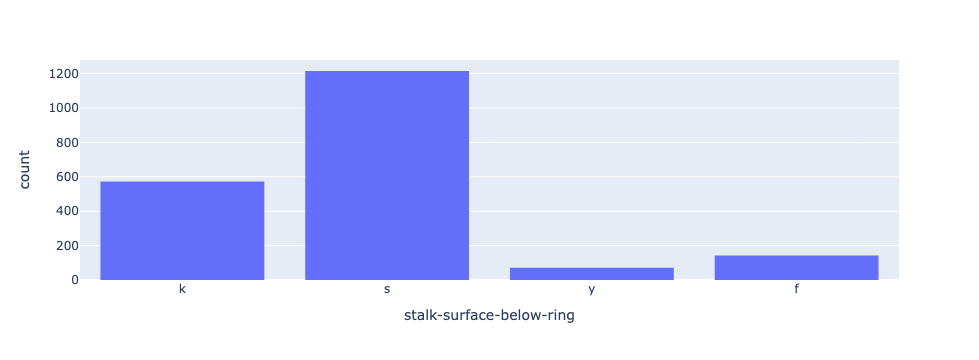

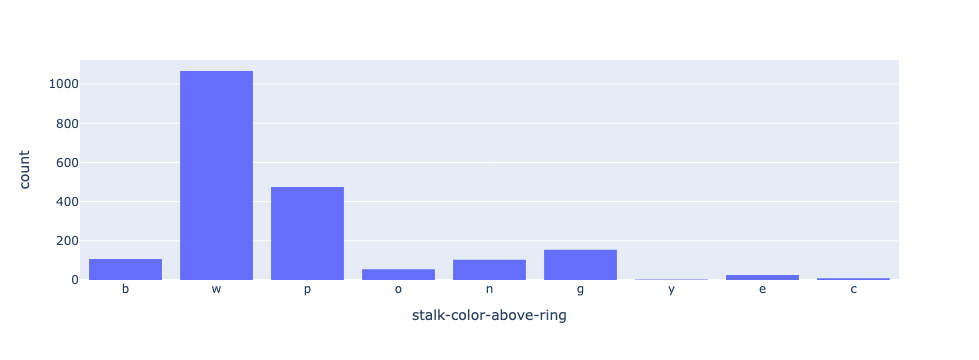

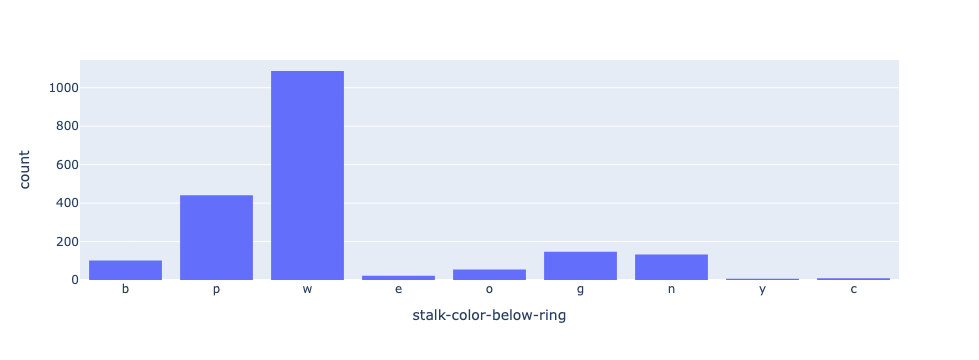

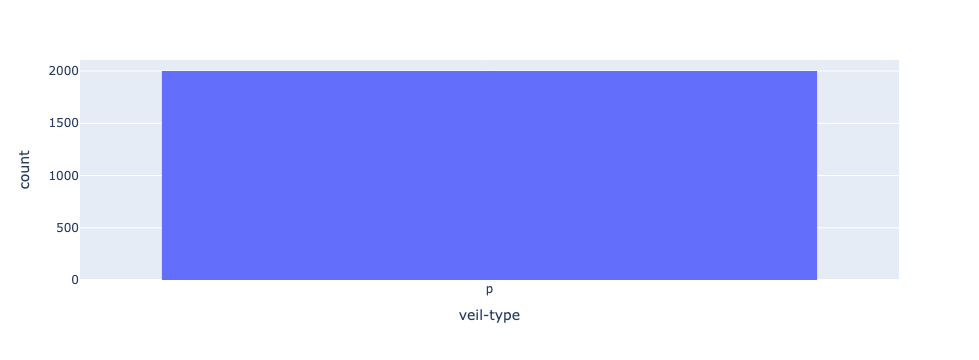

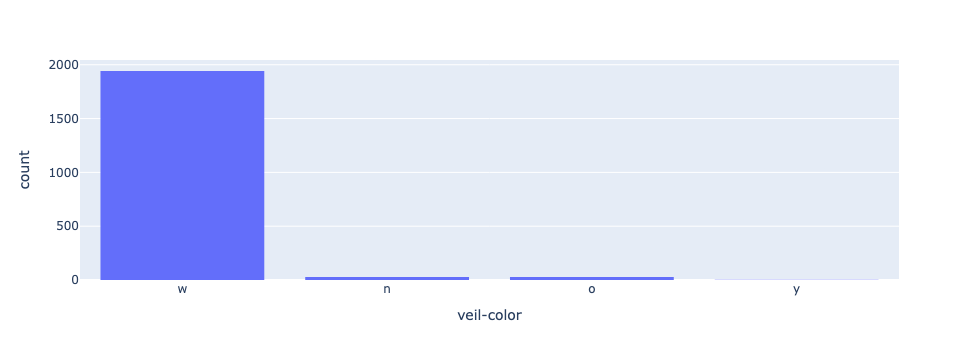

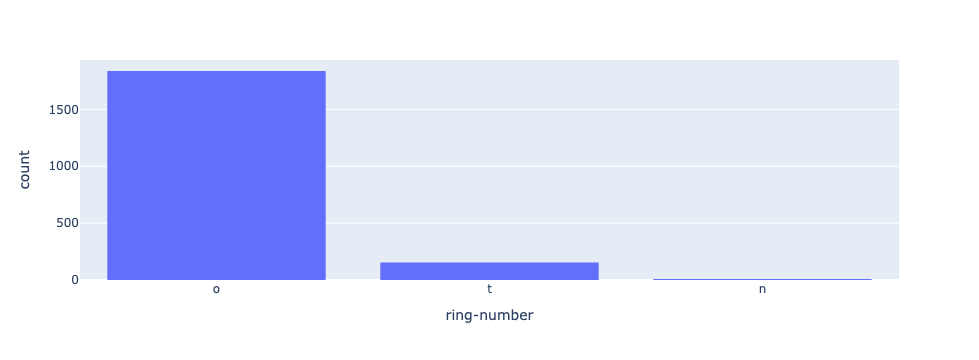

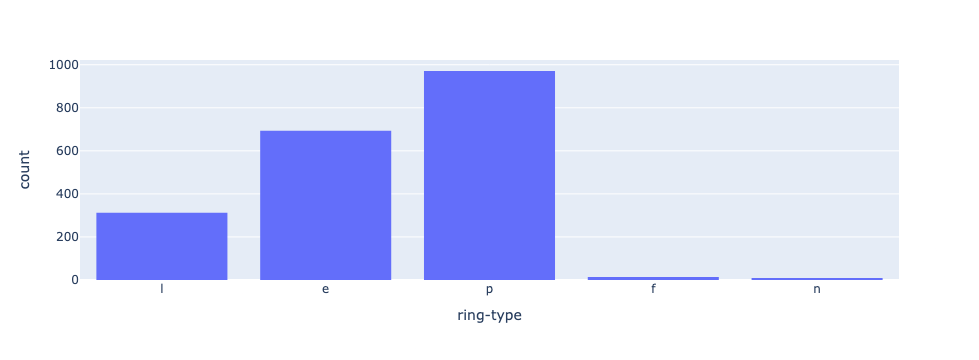

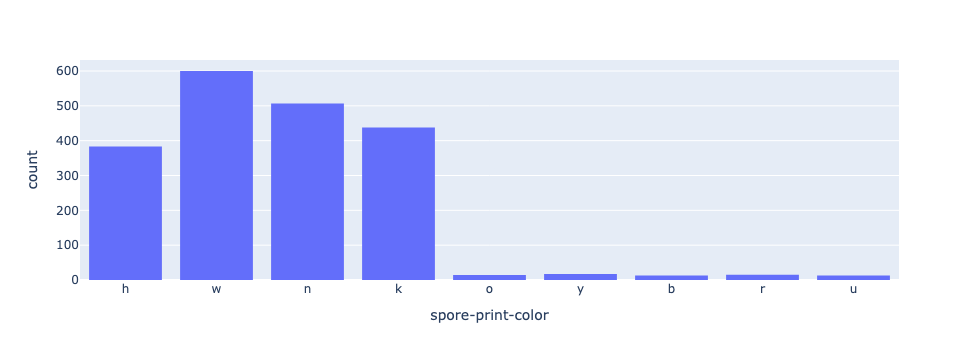

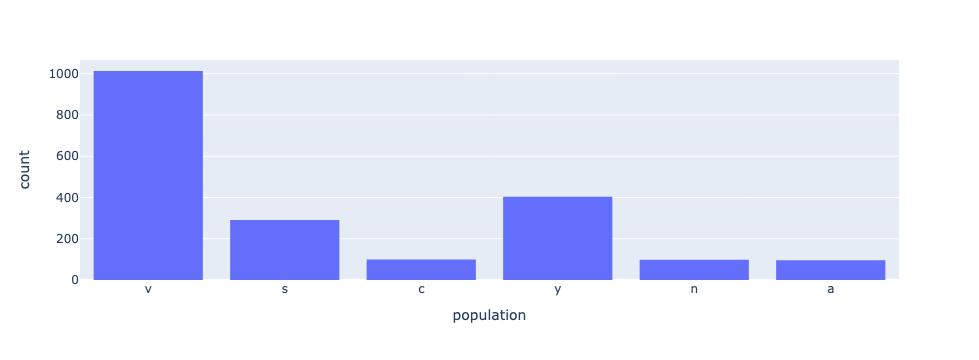

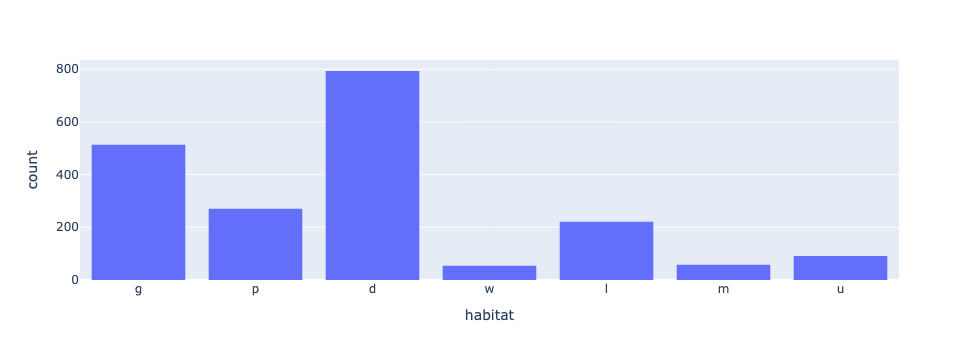

In [54]:
for i in dataframe.columns:
  fig = px.histogram(dataframe,x=i)
  (fig.show())

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="n+-#0`*wD8rg+dSg6M^w">i</variable><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable><variable id="AriMCkUM!81vTeAcb+6,">fig</variable><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable></variables><block type="controls_forEach" id="7YJ)K?q9poiHMo2hO,si" x="128" y="183"><field name="VAR" id="n+-#0`*wD8rg+dSg6M^w">i</field><value name="LIST"><block type="varGetProperty" id="k3#lLk(++xN{Qk3$B!$/"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><field name="MEMBER">columns</field><data>dataframe:columns</data></block></value><statement name="DO"><block type="variables_set" id="JN`QXdt~zSW=Hr{(pqls"><field name="VAR" id="AriMCkUM!81vTeAcb+6,">fig</field><value name="VALUE"><block type="varDoMethod" id="{:}eVR02P7FStzQGj0GV"><mutation items="2"></mutation><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field><field name="MEMBER">histogram</field><data>px:histogram</data><value name="ADD0"><block type="variables_get" id="B{:/S`es`cArHn$BSpgz"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="EJkj*okWGe[Qpr5%SNv:"><field name="CODE">x=i</field></block></value></block></value><next><block type="valueNoOutputCodeBlock" id="*]{)hCS_}Me{H!@?)K%d"><field name="CODE"></field><value name="INPUT"><block type="varDoMethod" id="cvXj7c717!,6,=={ao}n"><mutation items="1"></mutation><field name="VAR" id="AriMCkUM!81vTeAcb+6,">fig</field><field name="MEMBER">show</field><data>fig:show</data></block></value></block></next></block></statement></block></xml>

------------------
**QUESTION:**

What do you think about the distribution of levels of the variables now?

**ANSWER: (click here to edit)**

*Mostly pretty uneven.*

-------------------

## Prepare train/test sets

Separate our predictors (`X`) from our class label (`Y`), putting each into its own dataframe.

In [65]:
X = dataframe.drop(columns=['class'])
Y = dataframe['class']

Y

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="_z/H/tTnOYS1Lla2~;*0">X</variable><variable id="o8#tp%!,_Okj2aVwX(DL">Y</variable><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable></variables><block type="variables_set" id="M9g^9:hbZQ0Cb9jKq9V6" x="34" y="63"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field><value name="VALUE"><block type="varDoMethod" id="k7t38%eJz)@=B8{vW^(u"><mutation items="1"></mutation><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><field name="MEMBER">drop</field><data>dataframe:drop</data><value name="ADD0"><block type="dummyOutputCodeBlock" id="sBzY!-dj@SVCn*Q(%/v]"><field name="CODE">columns=['class']</field></block></value></block></value><next><block type="variables_set" id="aS-%8b}K4w{pZFaWI*rd"><field name="VAR" id="o8#tp%!,_Okj2aVwX(DL">Y</field><value name="VALUE"><block type="indexer" id="gZoxuW;h;$!5gTCWET:n"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><value name="INDEX"><block type="text" id="?;,ZuO[95_I*qUhPVQS!"><field name="TEXT">class</field></block></value></block></value></block></next></block><block type="variables_get" id="[VC%ygn/D}Uf/q$f!5RL" x="46" y="192"><field name="VAR" id="o8#tp%!,_Okj2aVwX(DL">Y</field></block></xml>

0       p
1       p
2       e
3       e
4       e
       ..
1995    p
1996    e
1997    e
1998    e
1999    p
Name: class, Length: 2000, dtype: object

Convert the nominal variables in `X` to dummies, storing the result in `X`. 
Keep all levels. 
We're doing this because we will use Bernoulli naive Bayes.

In [71]:
X = pd.get_dummies(X)

X

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="_z/H/tTnOYS1Lla2~;*0">X</variable><variable id="A]5Vf/x,=8dk=KKk3OrJ">pd</variable></variables><block type="variables_set" id="N[``Tj{Y-X9-:{:,LZie" x="0" y="0"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field><value name="VALUE"><block type="varDoMethod" id="!snzGlMsbL.%p)$iCu~-"><mutation items="1"></mutation><field name="VAR" id="A]5Vf/x,=8dk=KKk3OrJ">pd</field><field name="MEMBER">get_dummies</field><data>pd:get_dummies</data><value name="ADD0"><block type="variables_get" id="Gucr,3B!_-ScE+xxL3OS"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field></block></value></block></value></block><block type="variables_get" id="#W~Z^[AgcDsw}UHTa`p@" x="67" y="68"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field></block></xml>

cap-shape_b  cap-shape_f  cap-shape_k  cap-shape_s  cap-shape_x  \
0           False        False        False        False         True   
1           False         True        False        False        False   
2           False        False        False        False         True   
3           False         True        False        False        False   
4            True        False        False        False        False   
...           ...          ...          ...          ...          ...   
1995        False        False        False        False         True   
1996        False         True        False        False        False   
1997        False         True        False        False        False   
1998        False        False        False        False         True   
1999        False        False        False        False         True   

      cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  cap-color_b  \
0             False          False          False           True        False   
1             False          False          False           True        False   
2             False          False          False           True        False   
3             False          False          False           True        False   
4             False          False          False           True        False   
...             ...            ...            ...            ...          ...   
1995           True          False          False          False        False   
1996           True          False          False          False        False   
1997           True          False          False          False        False   
1998          False          False          False           True        False   
1999          False          False           True          False        False   

      ...  population_s  population_v  population_y  habitat_d  habitat_g  \
0     ...         False          True         False      False       True   
1     ...         False          True         False      False      False   
2     ...          True         False         False      False       True   
3     ...         False          True         False       True      False   
4     ...          True         False         False      False       True   
...   ...           ...           ...           ...        ...        ...   
1995  ...         False         False          True      False       True   
1996  ...         False          True         False       True      False   
1997  ...         False         False         False      False       True   
1998  ...         False         False          True       True      False   
1999  ...         False          True         False       True      False   

      habitat_l  habitat_m  habitat_p  habitat_u  habitat_w  
0         False      False      False      False      False  
1         False      False       True      False      False  
2         False      False      False      False      False  
3         False      False      False      False      False  
4         False      False      False      False      False  
...         ...        ...        ...        ...        ...  
1995      False      False      False      False      False  
1996      False      False      False      False      False  
1997      False      False      False      False      False  
1998      False      False      False      False      False  
1999      False      False      False      False      False  

[2000 rows x 111 columns]

To split the data into train/test sets, import `model_selection`.

In [74]:
import sklearn.model_selection as model_selection

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</variable></variables><block type="importAs" id="E{QJ$O@lc8u.;OTWdVgf" x="-89" y="168"><field name="libraryName">sklearn.model_selection</field><field name="VAR" id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</field></block></xml>

And do the actual spliting of data, using `random_state=1`.

In [84]:
splits = model_selection.train_test_split(X,Y,random_state=1)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable><variable id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</variable><variable id="_z/H/tTnOYS1Lla2~;*0">X</variable><variable id="o8#tp%!,_Okj2aVwX(DL">Y</variable></variables><block type="variables_set" id="HpD!.HSC`PPRg]21i*7c" x="0" y="0"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field><value name="VALUE"><block type="varDoMethod" id="fUetl3$Ak=SI~T6T5!6c"><mutation items="3"></mutation><field name="VAR" id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</field><field name="MEMBER">train_test_split</field><data>model_selection:train_test_split</data><value name="ADD0"><block type="variables_get" id=";yB$5eQ5-4J%Pgx,CZgN"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field></block></value><value name="ADD1"><block type="variables_get" id="Dh+MtM9eS$tUm7.I8J]1"><field name="VAR" id="o8#tp%!,_Okj2aVwX(DL">Y</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="vVM)kzA^dopLbt-N7YWc"><field name="CODE">random_state=1</field></block></value></block></value></block></xml>

### Fit model

Import libraries for:

- Naive Bayes
- Metrics
- Ravel

In [89]:
import sklearn.naive_bayes as naive_bayes
import numpy as np
import sklearn.metrics as metrics

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="KA0k4+i.iu,J]5!9Nj%^">naive_bayes</variable><variable id="hxqH|@PJU~wrI]t*tHgd">np</variable><variable id="jpz]0=,hLYv~rN^#0dFO">metrics</variable></variables><block type="importAs" id=")Z,7_rQ8n$[soP8C+|xJ" x="51" y="43"><field name="libraryName">sklearn.naive_bayes</field><field name="VAR" id="KA0k4+i.iu,J]5!9Nj%^">naive_bayes</field><next><block type="importAs" id="#n~K{o=Qop7Z[_YEjs`u"><field name="libraryName">numpy</field><field name="VAR" id="hxqH|@PJU~wrI]t*tHgd">np</field><next><block type="importAs" id="{H02K*?VA0K3yr,FD/;h"><field name="libraryName">sklearn.metrics</field><field name="VAR" id="jpz]0=,hLYv~rN^#0dFO">metrics</field></block></next></block></next></block></xml>

Create the Bernoulli naive Bayes model.

In [91]:
naiveBayes = naive_bayes.BernoulliNB()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id=".sY;T8@Q1`)*lHl?C]]T">naiveBayes</variable><variable id="KA0k4+i.iu,J]5!9Nj%^">naive_bayes</variable></variables><block type="variables_set" id="}81D/tZY#o}$E:M}:u4x" x="9" y="330"><field name="VAR" id=".sY;T8@Q1`)*lHl?C]]T">naiveBayes</field><value name="VALUE"><block type="varCreateObject" id="ar7keIh-Yv)+b+#Edsp_"><mutation items="1"></mutation><field name="VAR" id="KA0k4+i.iu,J]5!9Nj%^">naive_bayes</field><field name="MEMBER">BernoulliNB</field><data>naive_bayes:BernoulliNB</data></block></value></block></xml>

Train the model by calling `fit` on it.

In [104]:
naiveBayes.fit(splits[0],splits[2])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id=".sY;T8@Q1`)*lHl?C]]T">naiveBayes</variable><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable></variables><block type="varDoMethod" id="-@fm,911cJiCu@jkys%R" x="0" y="0"><mutation items="2"></mutation><field name="VAR" id=".sY;T8@Q1`)*lHl?C]]T">naiveBayes</field><field name="MEMBER">fit</field><data>naiveBayes:fit</data><value name="ADD0"><block type="lists_getIndex" id="@-1r|V#;IaDdjp9TB[P-"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="rZ|ulsDAg}s7US8Lnuw9"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id=".q.pT(s1eSU/,r9_DdF_"><field name="NUM">1</field></block></value></block></value><value name="ADD1"><block type="lists_getIndex" id="-3@pKFwdaoiD*d0noYj-"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="9XV($yDc_vYrr9a(.Zq8"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id=")bRq.hJ;)nxBap^$A6=L"><field name="NUM">3</field></block></value></block></value></block></xml>

BernoulliNB()

Get and save predictions.

In [112]:
predictions = naiveBayes.predict(splits[1])

predictions

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(`;mrW|63Vww]$wlV9+1">predictions</variable><variable id=".sY;T8@Q1`)*lHl?C]]T">naiveBayes</variable><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable></variables><block type="variables_set" id="FM4[*FDWeN(7%iHSAfQ?" x="55" y="42"><field name="VAR" id="(`;mrW|63Vww]$wlV9+1">predictions</field><value name="VALUE"><block type="varDoMethod" id="iyb},eS,^AG]P+e8|?_w"><mutation items="1"></mutation><field name="VAR" id=".sY;T8@Q1`)*lHl?C]]T">naiveBayes</field><field name="MEMBER">predict</field><data>naiveBayes:predict</data><value name="ADD0"><block type="lists_getIndex" id="-zfN@YTB}jJ`KQA7al^v"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="^X^[7[WoW35C^q#f,Ns!"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="JApw%...!YP)p3`]}.gX"><field name="NUM">2</field></block></value></block></value></block></value></block><block type="variables_get" id="_%rel1sFVet8$aC;ZGqu" x="18" y="167"><field name="VAR" id="(`;mrW|63Vww]$wlV9+1">predictions</field></block></xml>

array(['p', 'e', 'p', 'p', 'p', 'e', 'e', 'p', 'e', 'e', 'e', 'p', 'p',
       'e', 'e', 'e', 'e', 'p', 'e', 'e', 'e', 'e', 'e', 'p', 'e', 'e',
       'p', 'p', 'e', 'p', 'e', 'p', 'e', 'p', 'e', 'p', 'e', 'e', 'p',
       'e', 'p', 'e', 'p', 'e', 'p', 'p', 'p', 'e', 'p', 'e', 'e', 'p',
       'e', 'p', 'p', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'p', 'p', 'p',
       'e', 'p', 'e', 'p', 'p', 'e', 'e', 'e', 'e', 'p', 'p', 'p', 'e',
       'p', 'p', 'e', 'e', 'e', 'p', 'e', 'p', 'e', 'e', 'e', 'e', 'e',
       'p', 'e', 'e', 'p', 'e', 'p', 'e', 'p', 'p', 'p', 'e', 'e', 'p',
       'p', 'p', 'e', 'e', 'e', 'p', 'e', 'p', 'p', 'e', 'e', 'e', 'p',
       'e', 'e', 'p', 'p', 'e', 'p', 'e', 'p', 'p', 'p', 'e', 'e', 'e',
       'p', 'e', 'p', 'e', 'e', 'p', 'p', 'e', 'p', 'e', 'p', 'p', 'p',
       'e', 'e', 'p', 'e', 'p', 'e', 'p', 'e', 'p', 'p', 'e', 'p', 'p',
       'e', 'e', 'e', 'e', 'p', 'p', 'e', 'p', 'e', 'p', 'e', 'e', 'e',
       'e', 'e', 'p', 'e', 'p', 'e', 'e', 'p', 'e', 'p', 'e', 'e

### Evaluate the model

Get the accuracy.

In [128]:
print(metrics.accuracy_score(splits[3],predictions))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="jpz]0=,hLYv~rN^#0dFO">metrics</variable><variable id="(`;mrW|63Vww]$wlV9+1">predictions</variable><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable></variables><block type="text_print" id="u8M]eo-vRBhX!L/a@4+J" x="41" y="42"><value name="TEXT"><block type="varDoMethod" id="0B;?~qgT4?Xe8I|O=P)%"><mutation items="2"></mutation><field name="VAR" id="jpz]0=,hLYv~rN^#0dFO">metrics</field><field name="MEMBER">accuracy_score</field><data>metrics:accuracy_score</data><value name="ADD0"><block type="lists_getIndex" id="fwifcDpdX9c6KmcS~Q+J"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="1Gd~hZ$|a/A]^PAUU!5,"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="nBX8v;gLZ3S#Q$bPv0Hp"><field name="NUM">4</field></block></value></block></value><value name="ADD1"><block type="variables_get" id="Ts3st_KqNOWh3S7|9x9a"><field name="VAR" id="(`;mrW|63Vww]$wlV9+1">predictions</field></block></value></block></value></block></xml>

0.924


And get the recall and precision.

In [139]:
print(metrics.classification_report(splits[3],predictions))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="jpz]0=,hLYv~rN^#0dFO">metrics</variable><variable id="(`;mrW|63Vww]$wlV9+1">predictions</variable><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable></variables><block type="text_print" id="jFo8knaDn;JRZ=Fj7Tzo" x="0" y="0"><value name="TEXT"><block type="varDoMethod" id="(y`#h=AgNH6X+ahL$2L$"><mutation items="2"></mutation><field name="VAR" id="jpz]0=,hLYv~rN^#0dFO">metrics</field><field name="MEMBER">classification_report</field><data>metrics:classification_report</data><value name="ADD0"><block type="lists_getIndex" id="fwifcDpdX9c6KmcS~Q+J"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="1Gd~hZ$|a/A]^PAUU!5,"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="nBX8v;gLZ3S#Q$bPv0Hp"><field name="NUM">4</field></block></value></block></value><value name="ADD1"><block type="variables_get" id="J4F^j!Q;*mp`ZlrCaweO"><field name="VAR" id="(`;mrW|63Vww]$wlV9+1">predictions</field></block></value></block></value></block></xml>

              precision    recall  f1-score   support

           e       0.90      0.96      0.93       273
           p       0.95      0.88      0.91       227

    accuracy                           0.92       500
   macro avg       0.93      0.92      0.92       500
weighted avg       0.93      0.92      0.92       500



Performance is very good for both classes.

------------------
**QUESTION:**

With this level of accuracy, would you eat a mushroom that the classifer said wasn't poisonous?

**ANSWER: (click here to edit)**

*I guess it depends on how hungry I was and whether I would die if it were poisonous*

-------------------

## Visualizing

### Feature importance

To see the feature importances, create a dataframe of the probabilities of predictors given the class label, i.e. `feature_log_prob_`, then give that dataframe correct row/column names (using `index` and `columns`, and finally raise it to the power of ten (because the default output is log).

In [140]:

#<xml xmlns="https://developers.google.com/blockly/xml"></xml>

cap-shape_b  cap-shape_f  cap-shape_k   cap-shape_s  cap-shape_x  \
e     0.004584     0.103296     0.001107  1.325139e-05     0.179787   
p     0.000098     0.113225     0.016361  2.668823e-07     0.142288   

   cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  cap-color_b  \
e       0.090057   2.140434e-07        0.06047       0.091562     0.000054   
p       0.023718   6.495524e-06        0.08464       0.165704     0.000329   

   ...  population_s  population_v  population_y  habitat_d  habitat_g  \
e  ...      0.024364      0.059874      0.035111   0.154325   0.083462   
p  ...      0.003316      0.508998      0.014246   0.076896   0.015132   

   habitat_l  habitat_m  habitat_p  habitat_u     habitat_w  
e   0.001748   0.000986   0.000423   0.000146  1.169961e-03  
p   0.018643   0.000006   0.044881   0.002385  2.668823e-07  

[2 rows x 111 columns]

Plot these feature importances in a loop, where each is a bar plot.

**Note:** This will take some time. Once it's done, you should be able to scroll down to view.

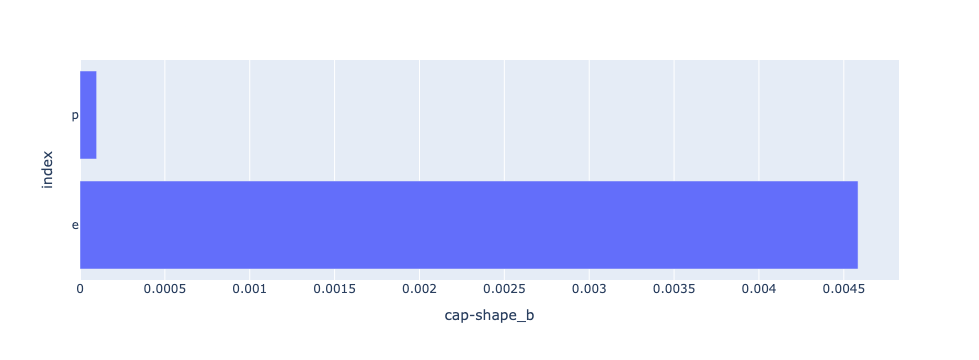

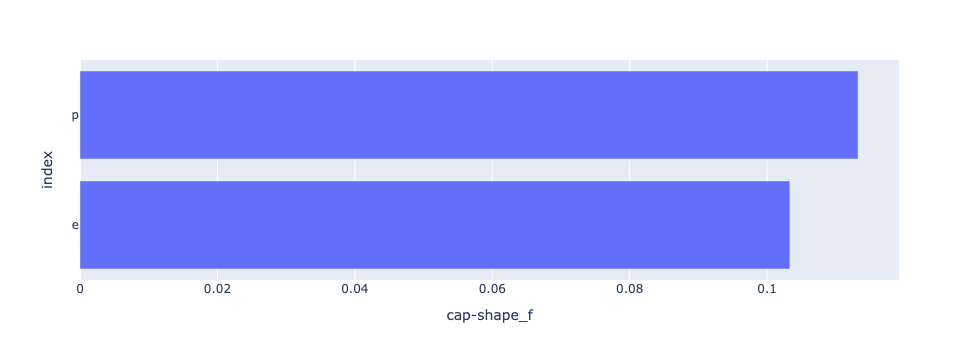

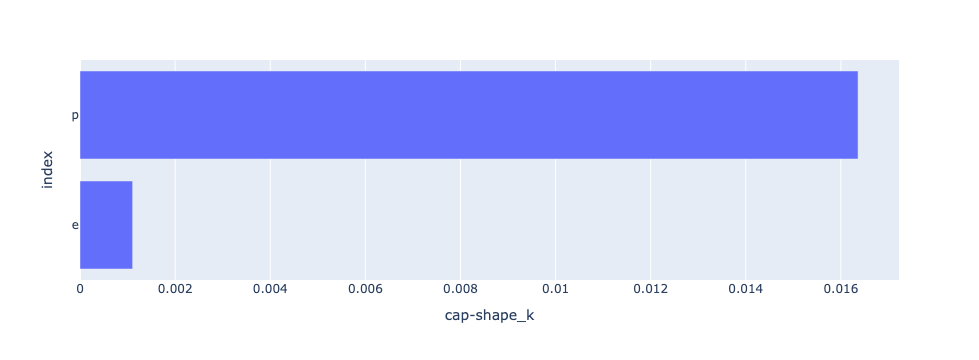

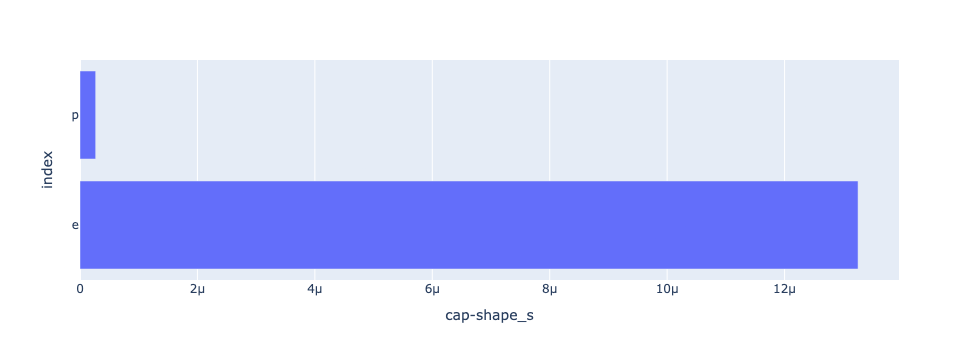

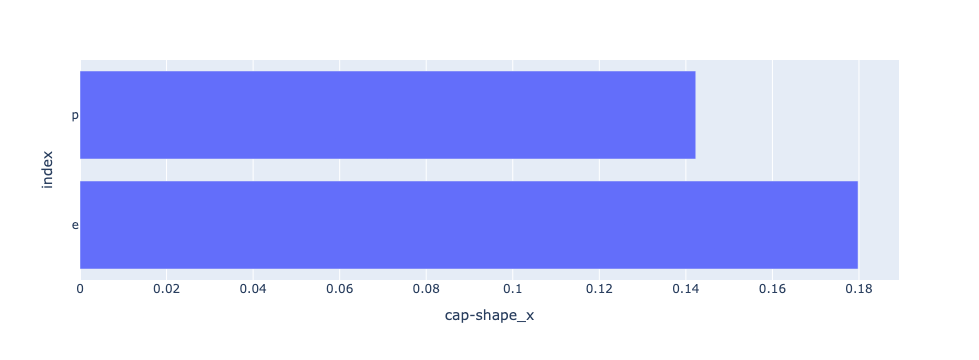

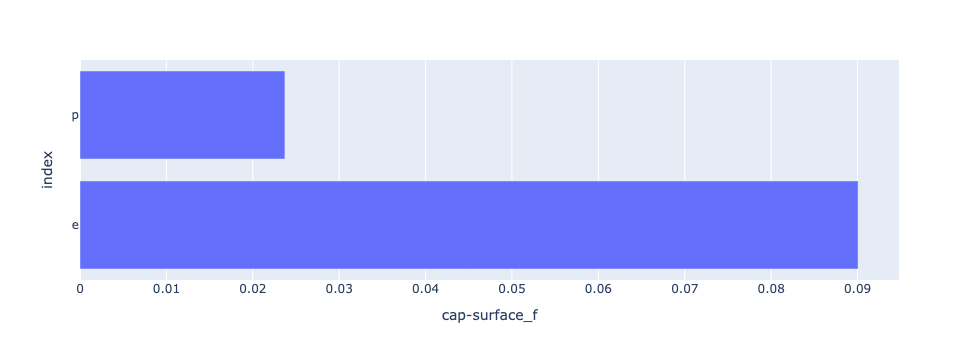

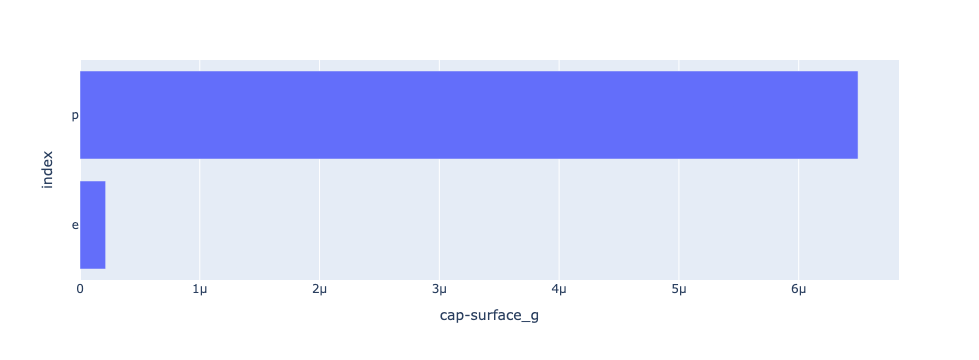

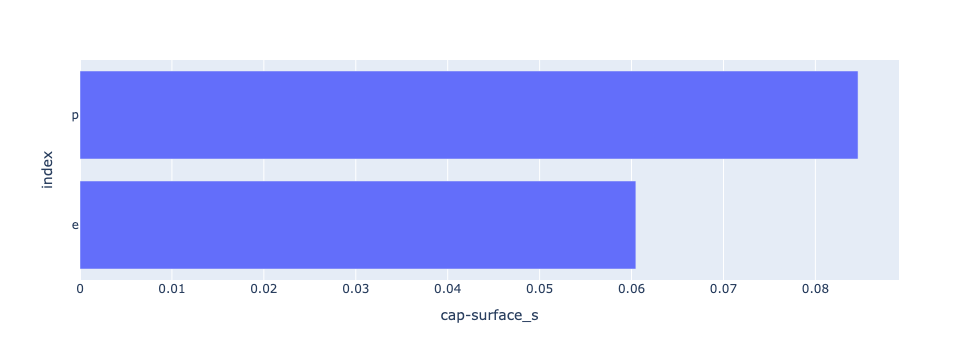

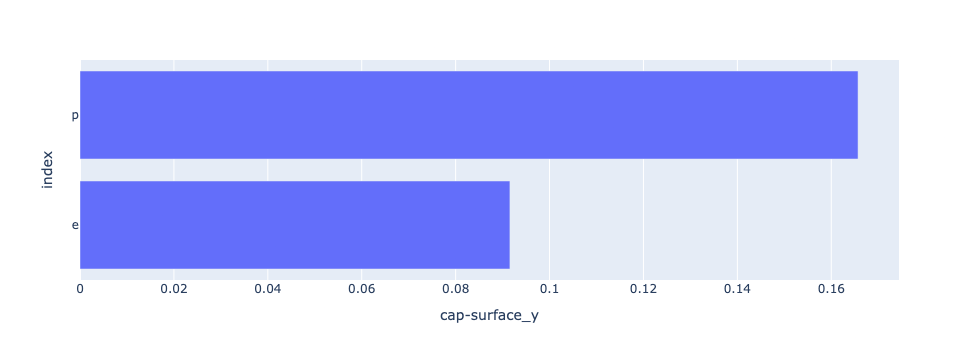

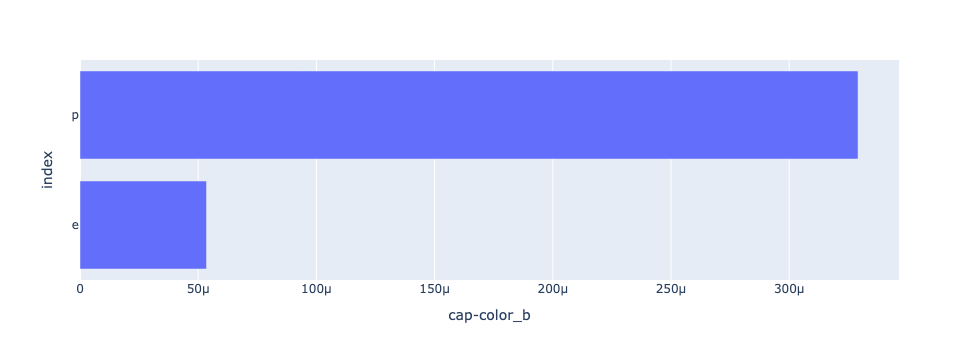

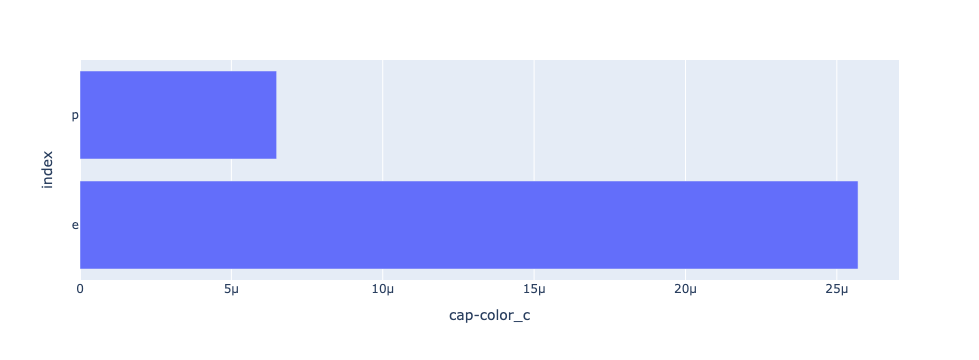

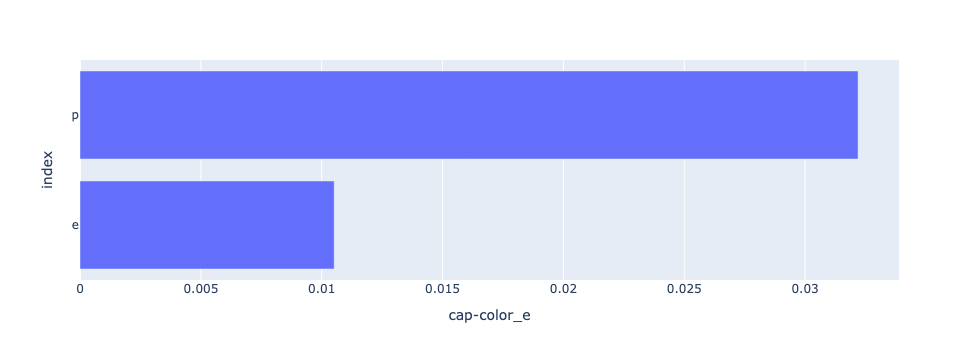

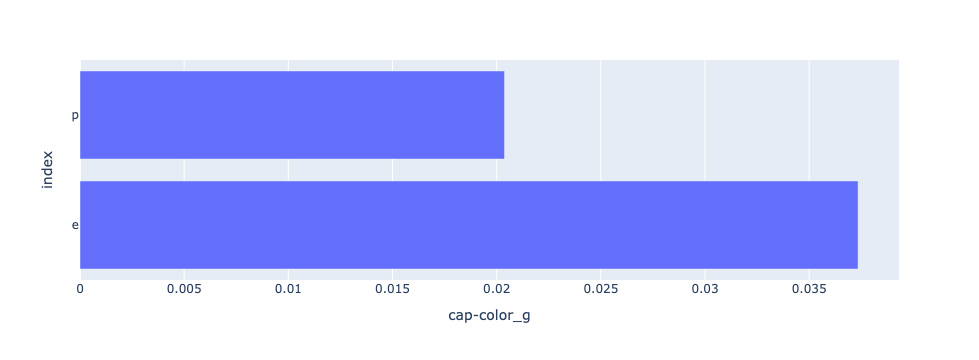

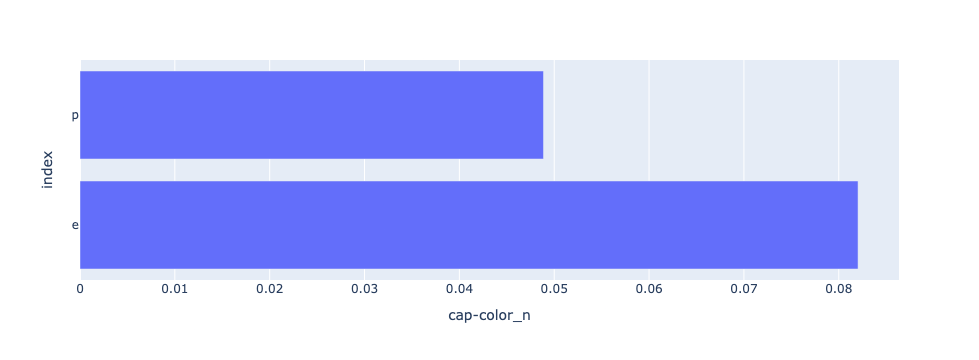

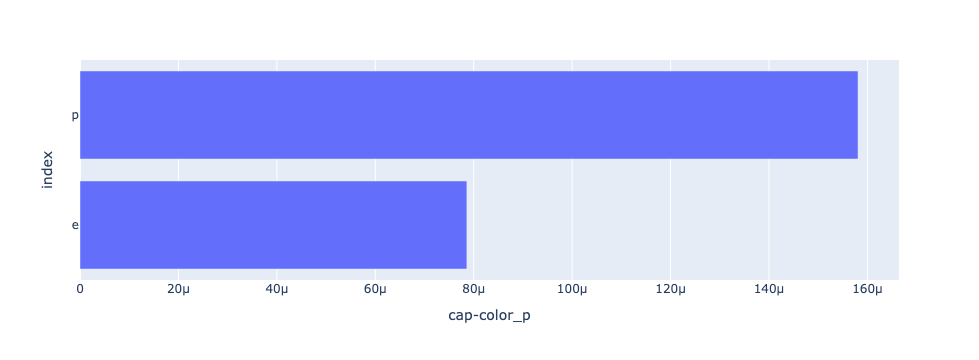

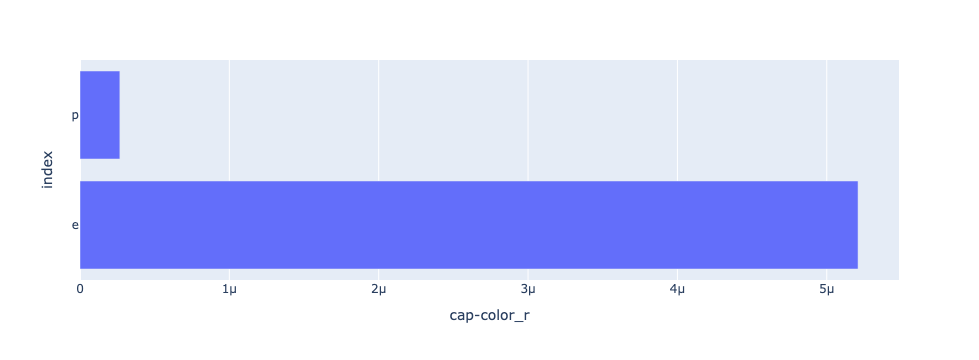

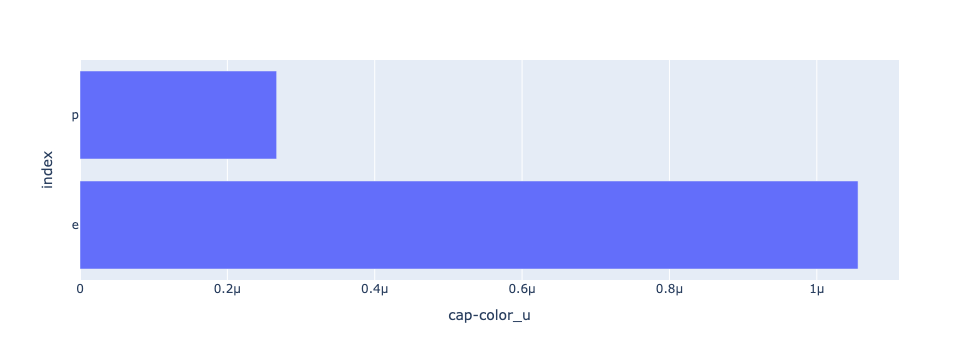

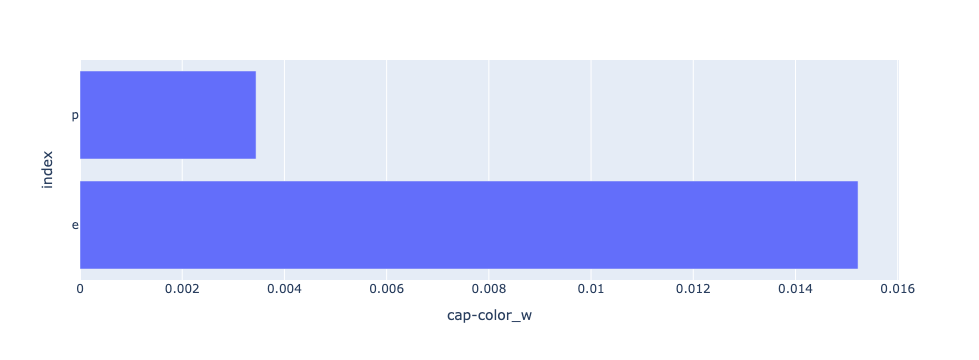

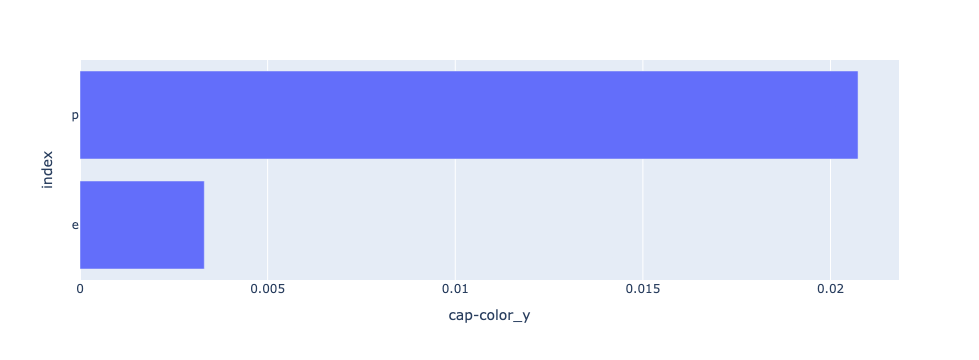

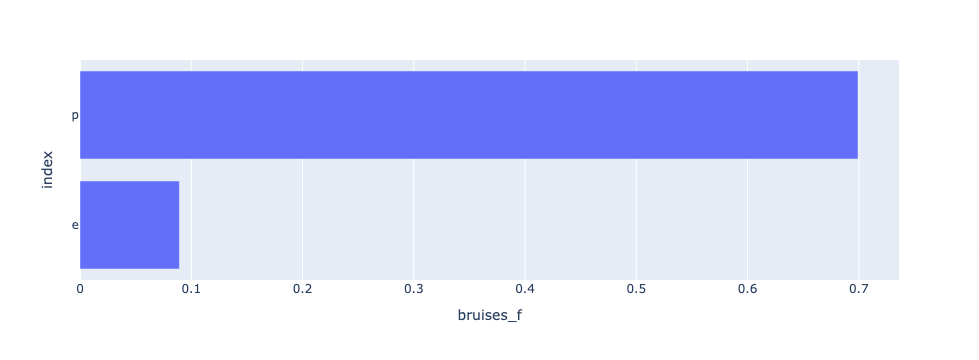

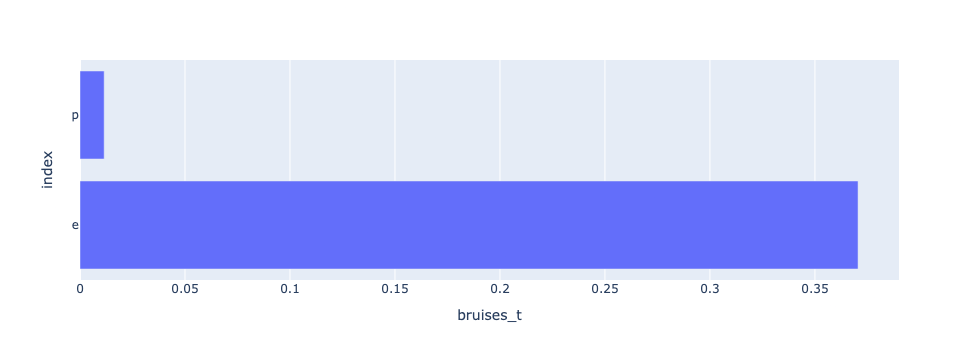

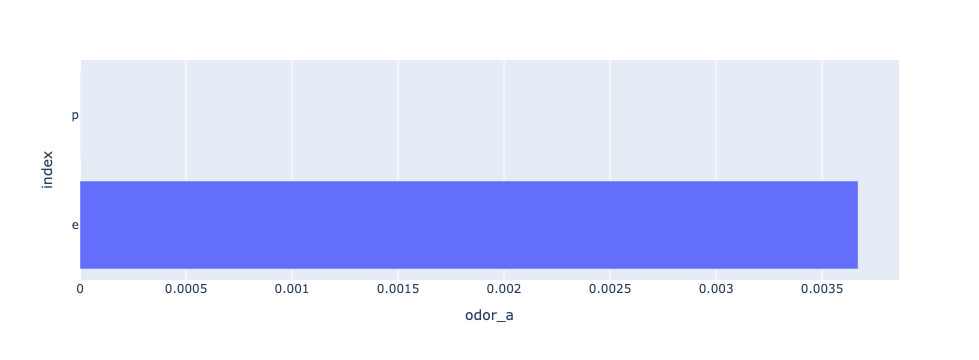

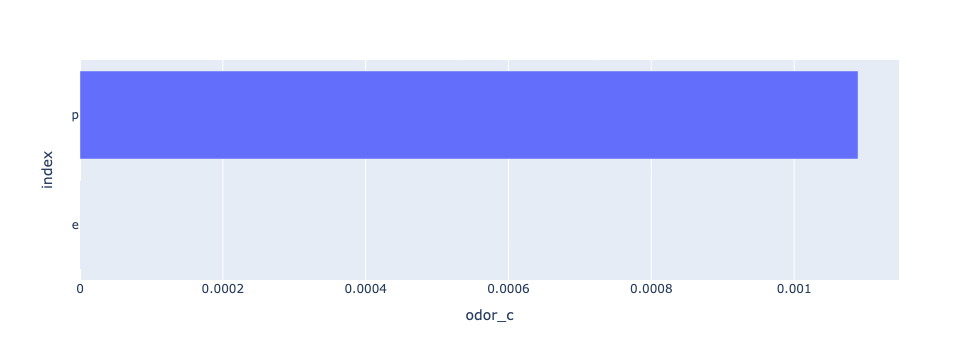

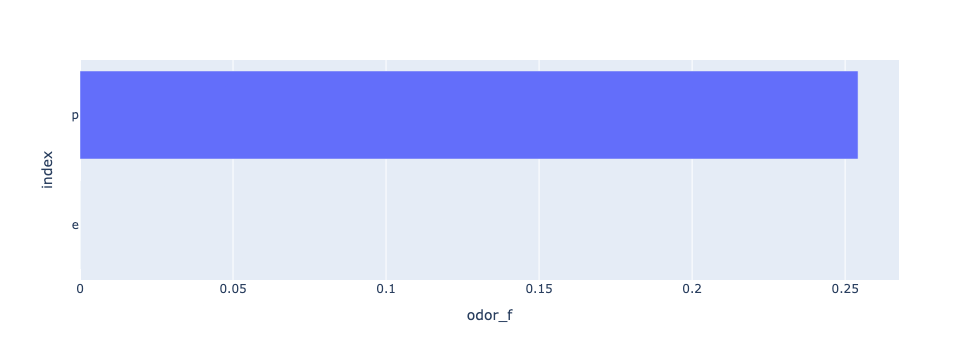

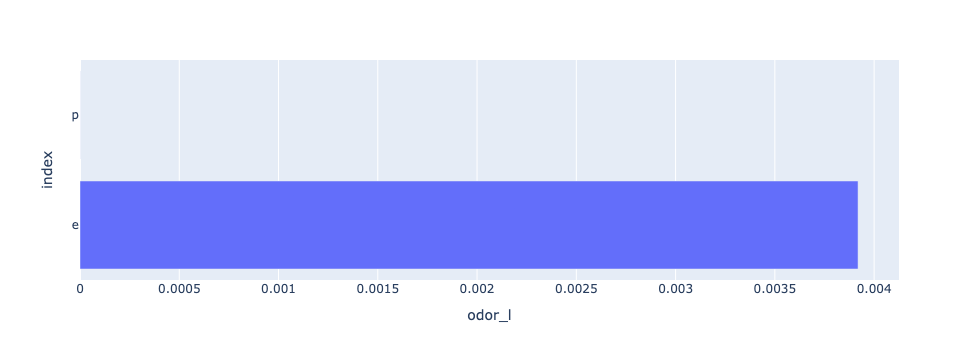

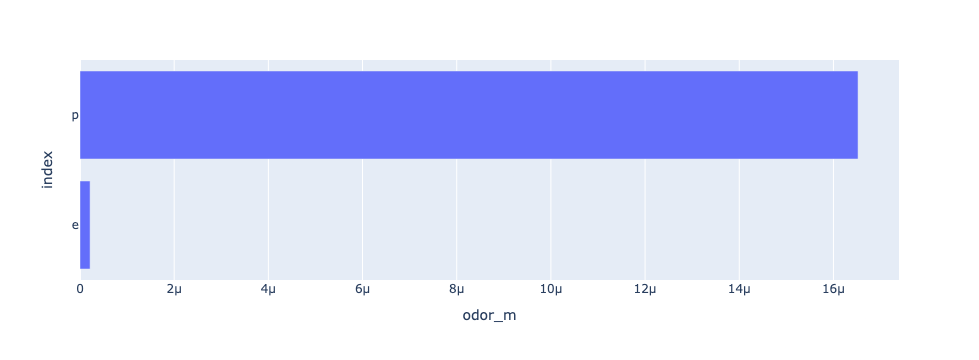

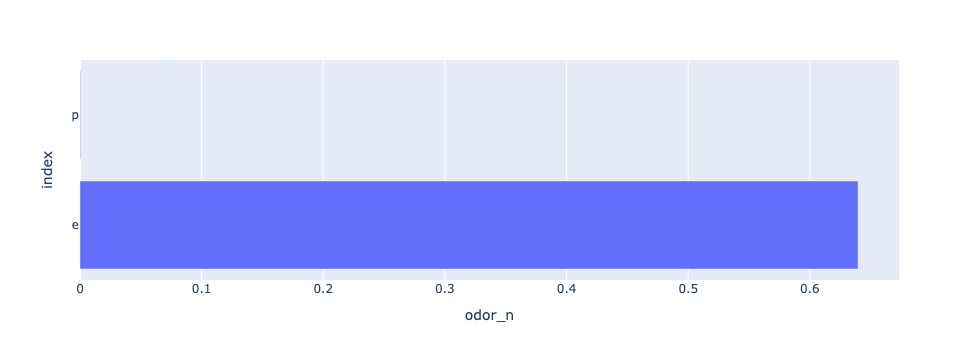

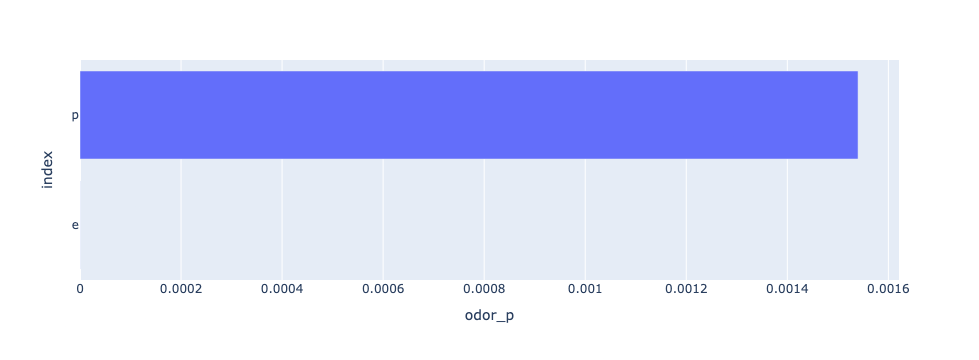

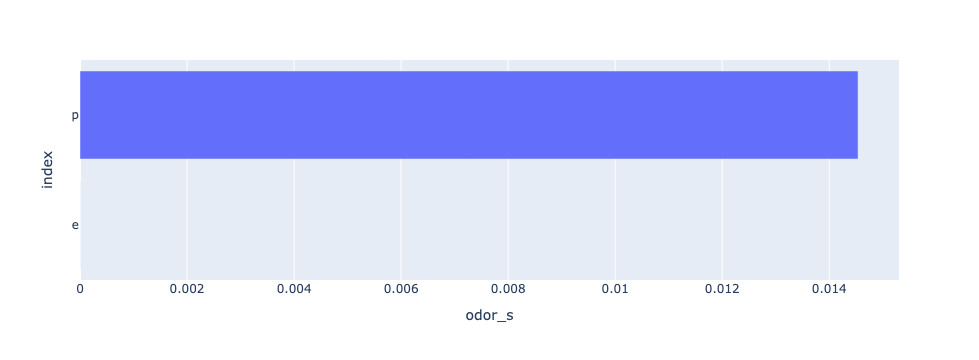

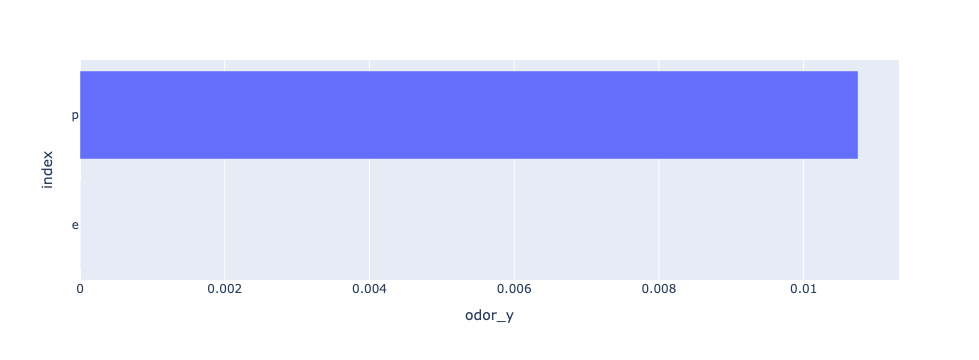

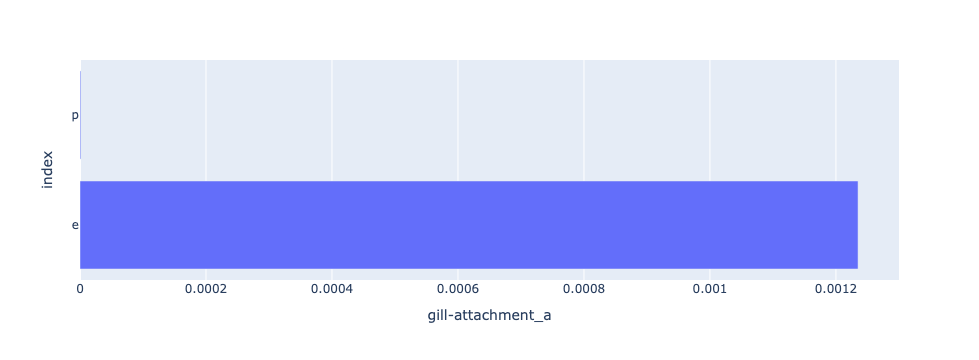

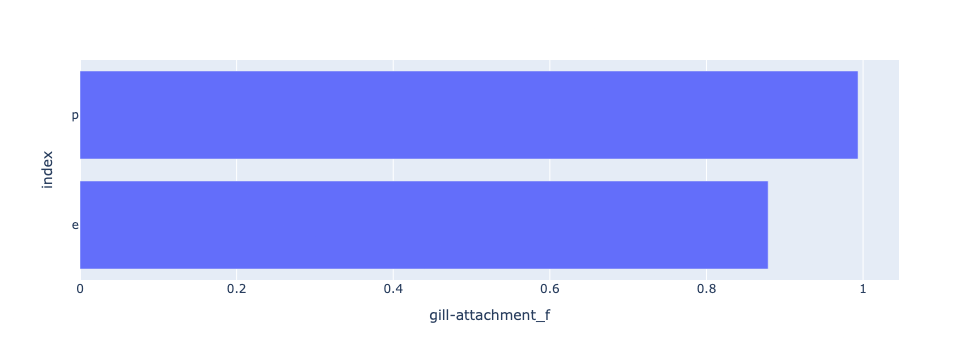

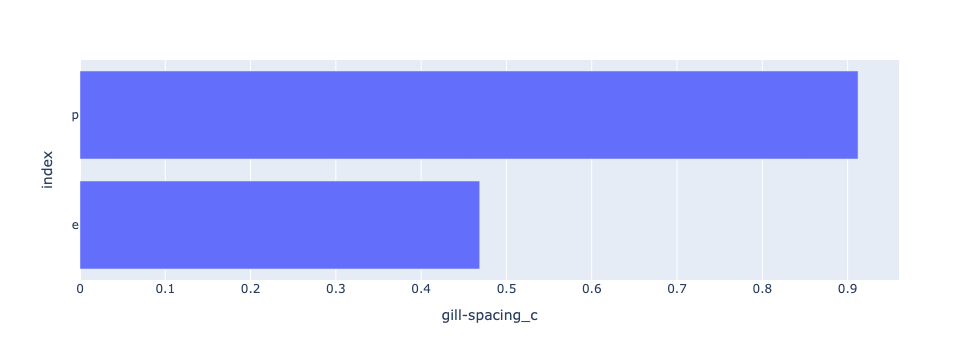

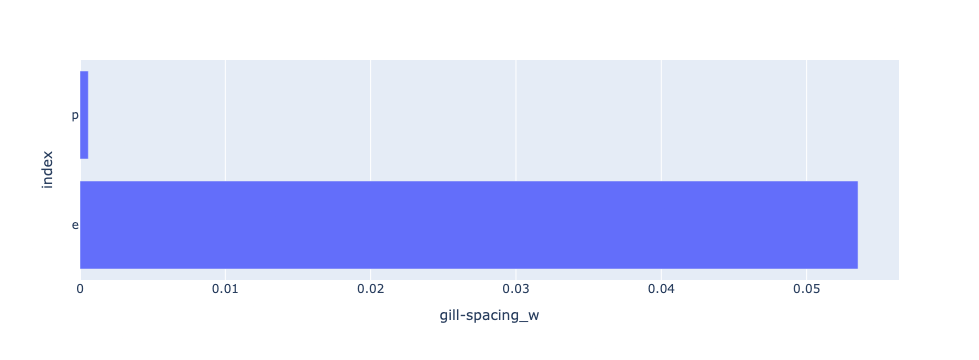

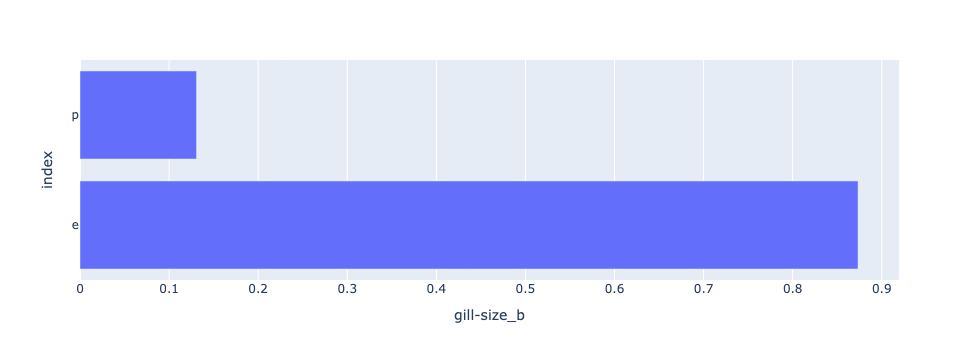

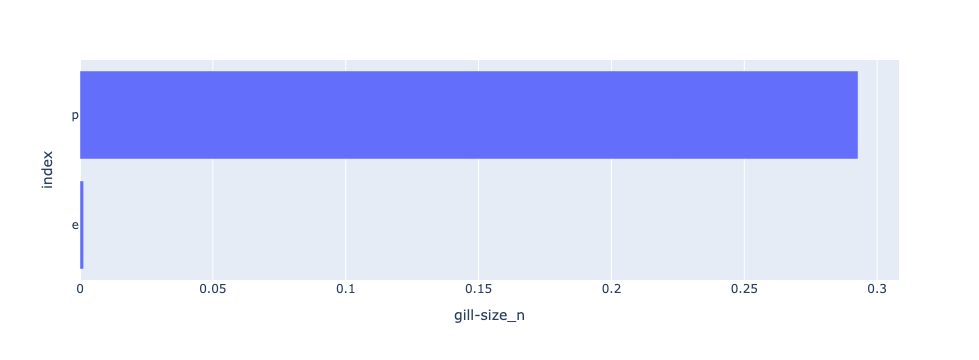

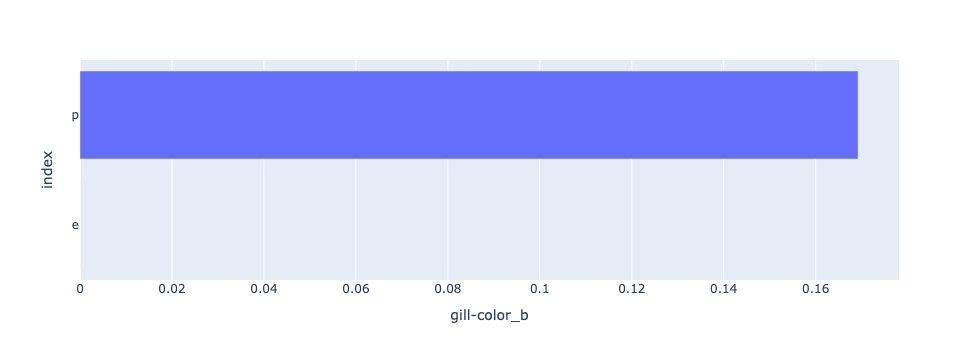

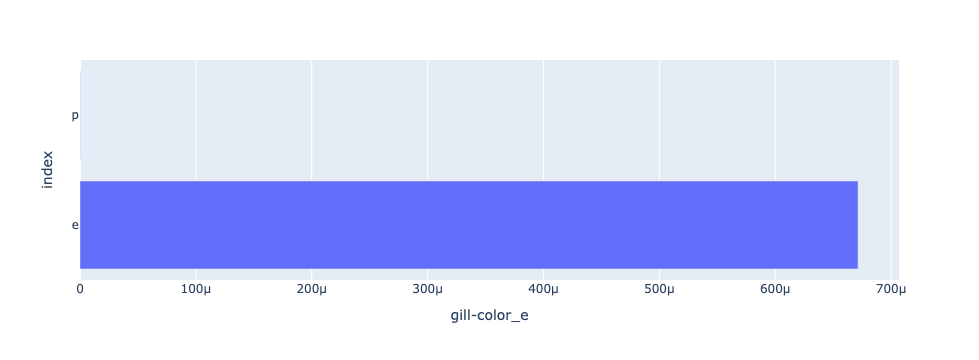

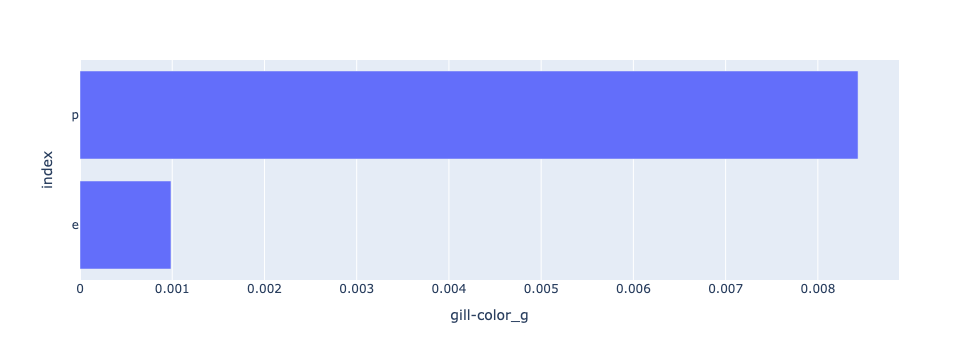

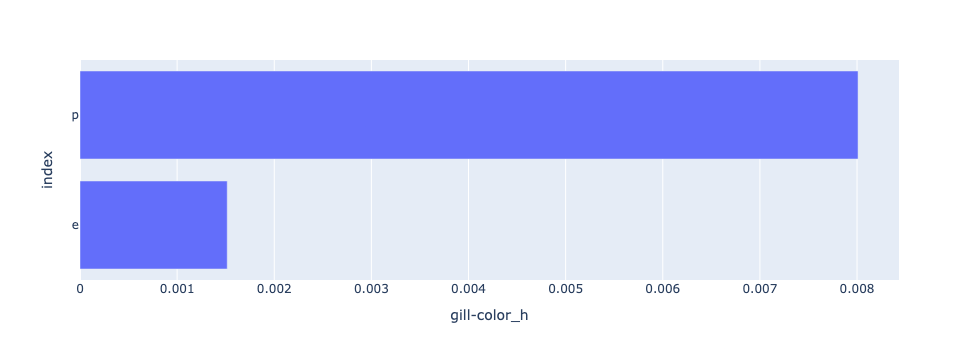

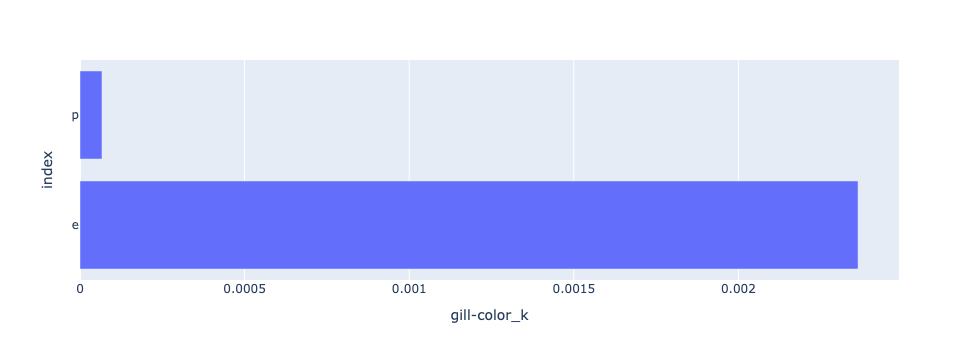

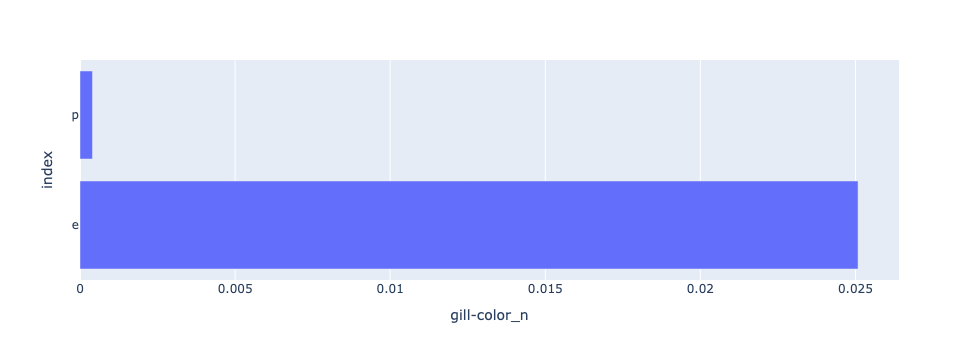

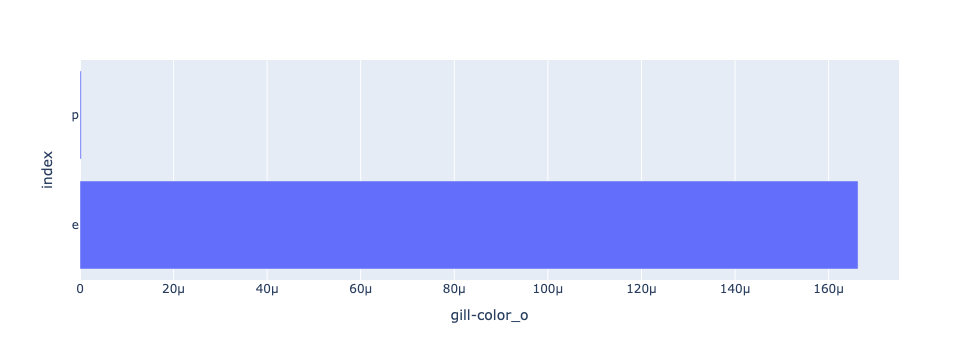

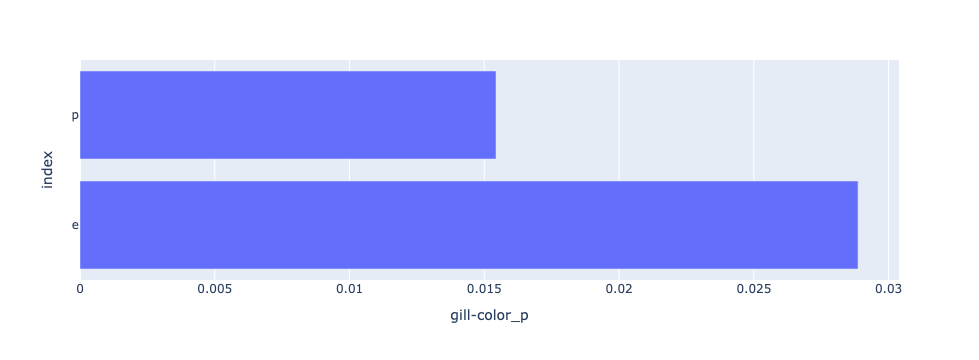

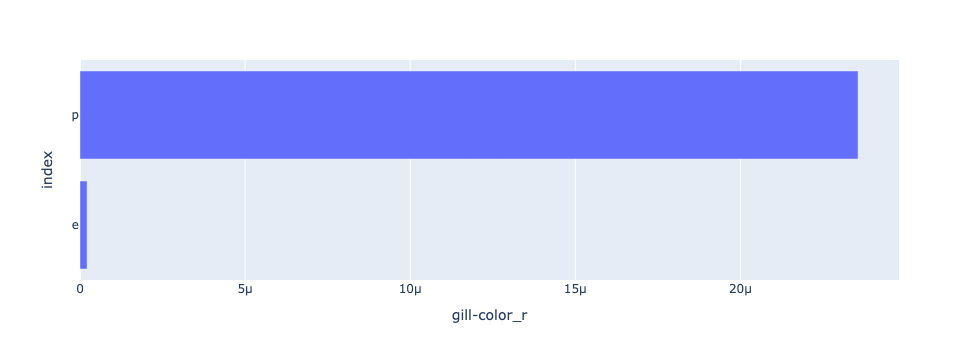

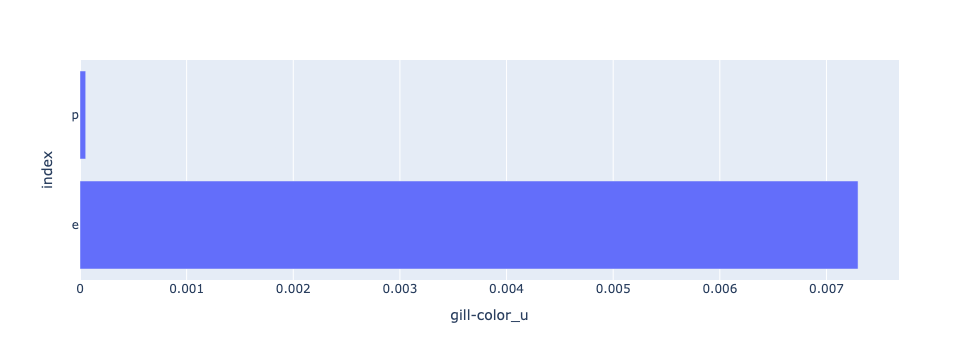

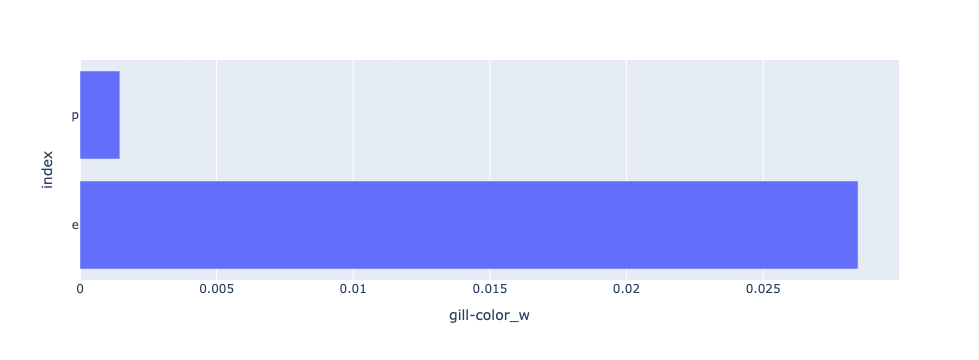

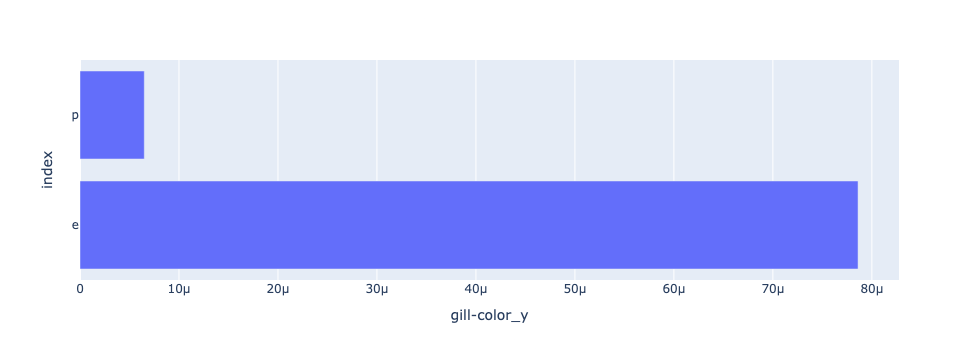

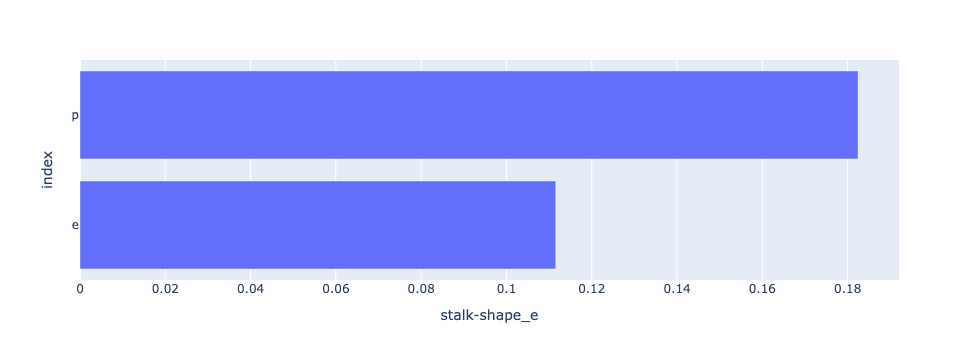

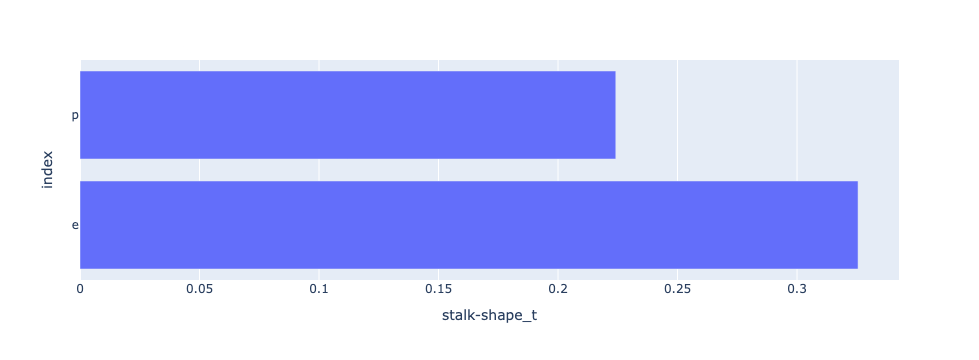

In [152]:
for i in output.columns:
  fig = px.bar(output,x=i)
  (fig.show())

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="n+-#0`*wD8rg+dSg6M^w">i</variable><variable id="B1+(FA+B_0M9*6bKcj,o">output</variable><variable id="AriMCkUM!81vTeAcb+6,">fig</variable><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable></variables><block type="controls_forEach" id="7YJ)K?q9poiHMo2hO,si" x="37" y="56"><field name="VAR" id="n+-#0`*wD8rg+dSg6M^w">i</field><value name="LIST"><block type="varGetProperty" id="k3#lLk(++xN{Qk3$B!$/"><field name="VAR" id="B1+(FA+B_0M9*6bKcj,o">output</field><field name="MEMBER">columns</field><data>output:columns</data></block></value><statement name="DO"><block type="variables_set" id="JN`QXdt~zSW=Hr{(pqls"><field name="VAR" id="AriMCkUM!81vTeAcb+6,">fig</field><value name="VALUE"><block type="varDoMethod" id="{:}eVR02P7FStzQGj0GV"><mutation items="2"></mutation><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field><field name="MEMBER">bar</field><data>px:bar</data><value name="ADD0"><block type="variables_get" id="O/.c1BgDtBSgxtFn;zhR"><field name="VAR" id="B1+(FA+B_0M9*6bKcj,o">output</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="L]:.D!VfkPD2/QP[#ho+"><field name="CODE">x=i</field></block></value></block></value><next><block type="valueNoOutputCodeBlock" id="CX;6wQBEV!bJ4!pR9A2_"><field name="CODE"></field><value name="INPUT"><block type="varDoMethod" id="mn5AjQuc.kz!,ZKbfI7w"><mutation items="1"></mutation><field name="VAR" id="AriMCkUM!81vTeAcb+6,">fig</field><field name="MEMBER">show</field><data>fig:show</data></block></value></block></next></block></statement></block></xml>

------------------
**QUESTION:**

Are there any single features you think you'd trust to tell the difference between edible and poisonous?

**ANSWER: (click here to edit)**

*`habitat_w` looks pretty good. There are quite a few that seem to be 100% diagnostic.*

-------------------